In [1]:
pip install geopandas 

In [2]:
pip install rasterio

In [3]:
import geopandas as  gpd
import rasterio

In [4]:
#read the shapefile

file=gpd.read_file(r'/content/GU_CountyOrEquivalent.shx')
file

,geometry
0,"POLYGON ((-90.18179 41.84354, -90.18158 41.844..."
1,"POLYGON ((-96.55516 41.91587, -96.55517 41.917..."
2,"POLYGON ((-96.12080 41.03799, -96.12002 41.038..."
3,"POLYGON ((-95.09133 42.12396, -95.09133 42.125..."
4,"POLYGON ((-91.71848 40.72600, -91.71847 40.726..."
...,...
133,"POLYGON ((-92.40934 40.89912, -92.40909 40.899..."
134,"POLYGON ((-92.55408 43.08307, -92.55406 43.086..."
135,"POLYGON ((-95.86029 43.08370, -95.86030 43.084..."
136,"POLYGON ((-94.47167 40.81255, -94.47167 40.814..."


In [5]:
#creating additional features
file['boundary'] = file.boundary
file["area"] = file.area
#using geopandas to convert longitude and latitudes to points
file['centroid'] = file.centroid

file

,geometry,boundary,area,centroid
0,"POLYGON ((-90.18179 41.84354, -90.18158 41.844...","LINESTRING (-90.18179 41.84354, -90.18158 41.8...",0.195265,POINT (-89.91410 41.75625)
1,"POLYGON ((-96.55516 41.91587, -96.55517 41.917...","LINESTRING (-96.55516 41.91587, -96.55517 41.9...",0.139575,POINT (-96.32860 41.85156)
2,"POLYGON ((-96.12080 41.03799, -96.12002 41.038...","LINESTRING (-96.12080 41.03799, -96.12002 41.0...",0.156652,POINT (-96.14087 40.90972)
3,"POLYGON ((-95.09133 42.12396, -95.09133 42.125...","LINESTRING (-95.09133 42.12396, -95.09133 42.1...",0.160593,POINT (-94.86055 42.03623)
4,"POLYGON ((-91.71848 40.72600, -91.71847 40.726...","LINESTRING (-91.71848 40.72600, -91.71847 40.7...",0.148586,POINT (-91.47926 40.64198)
...,...,...,...,...
133,"POLYGON ((-92.40934 40.89912, -92.40909 40.899...","LINESTRING (-92.40934 40.89912, -92.40909 40.8...",0.139419,POINT (-92.40972 40.74769)
134,"POLYGON ((-92.55408 43.08307, -92.55406 43.086...","LINESTRING (-92.55408 43.08307, -92.55406 43.0...",0.144715,POINT (-92.31766 43.06004)
135,"POLYGON ((-95.86029 43.08370, -95.86030 43.084...","LINESTRING (-95.86029 43.08370, -95.86030 43.0...",0.164109,POINT (-95.62488 43.08375)
136,"POLYGON ((-94.47167 40.81255, -94.47167 40.814...","LINESTRING (-94.47167 40.81255, -94.47167 40.8...",0.148784,POINT (-94.24397 40.73520)


In [6]:
#create empty column fro elevation values
file['elevation']=0
file

,geometry,boundary,area,centroid,elevation
0,"POLYGON ((-90.18179 41.84354, -90.18158 41.844...","LINESTRING (-90.18179 41.84354, -90.18158 41.8...",0.195265,POINT (-89.91410 41.75625),0
1,"POLYGON ((-96.55516 41.91587, -96.55517 41.917...","LINESTRING (-96.55516 41.91587, -96.55517 41.9...",0.139575,POINT (-96.32860 41.85156),0
2,"POLYGON ((-96.12080 41.03799, -96.12002 41.038...","LINESTRING (-96.12080 41.03799, -96.12002 41.0...",0.156652,POINT (-96.14087 40.90972),0
3,"POLYGON ((-95.09133 42.12396, -95.09133 42.125...","LINESTRING (-95.09133 42.12396, -95.09133 42.1...",0.160593,POINT (-94.86055 42.03623),0
4,"POLYGON ((-91.71848 40.72600, -91.71847 40.726...","LINESTRING (-91.71848 40.72600, -91.71847 40.7...",0.148586,POINT (-91.47926 40.64198),0
...,...,...,...,...,...
133,"POLYGON ((-92.40934 40.89912, -92.40909 40.899...","LINESTRING (-92.40934 40.89912, -92.40909 40.8...",0.139419,POINT (-92.40972 40.74769),0
134,"POLYGON ((-92.55408 43.08307, -92.55406 43.086...","LINESTRING (-92.55408 43.08307, -92.55406 43.0...",0.144715,POINT (-92.31766 43.06004),0
135,"POLYGON ((-95.86029 43.08370, -95.86030 43.084...","LINESTRING (-95.86029 43.08370, -95.86030 43.0...",0.164109,POINT (-95.62488 43.08375),0
136,"POLYGON ((-94.47167 40.81255, -94.47167 40.814...","LINESTRING (-94.47167 40.81255, -94.47167 40.8...",0.148784,POINT (-94.24397 40.73520),0


In [7]:
#extracting longtude and latitude coordinates
file["latitude"] = file.centroid.map(lambda p: p.x)
file["longitude"] = file.centroid.map(lambda p: p.y)

file

,geometry,boundary,area,centroid,elevation,latitude,longitude
0,"POLYGON ((-90.18179 41.84354, -90.18158 41.844...","LINESTRING (-90.18179 41.84354, -90.18158 41.8...",0.195265,POINT (-89.91410 41.75625),0,-89.914103,41.756255
1,"POLYGON ((-96.55516 41.91587, -96.55517 41.917...","LINESTRING (-96.55516 41.91587, -96.55517 41.9...",0.139575,POINT (-96.32860 41.85156),0,-96.328604,41.851563
2,"POLYGON ((-96.12080 41.03799, -96.12002 41.038...","LINESTRING (-96.12080 41.03799, -96.12002 41.0...",0.156652,POINT (-96.14087 40.90972),0,-96.140866,40.909722
3,"POLYGON ((-95.09133 42.12396, -95.09133 42.125...","LINESTRING (-95.09133 42.12396, -95.09133 42.1...",0.160593,POINT (-94.86055 42.03623),0,-94.860554,42.036233
4,"POLYGON ((-91.71848 40.72600, -91.71847 40.726...","LINESTRING (-91.71848 40.72600, -91.71847 40.7...",0.148586,POINT (-91.47926 40.64198),0,-91.479264,40.641982
...,...,...,...,...,...,...,...
133,"POLYGON ((-92.40934 40.89912, -92.40909 40.899...","LINESTRING (-92.40934 40.89912, -92.40909 40.8...",0.139419,POINT (-92.40972 40.74769),0,-92.409717,40.747689
134,"POLYGON ((-92.55408 43.08307, -92.55406 43.086...","LINESTRING (-92.55408 43.08307, -92.55406 43.0...",0.144715,POINT (-92.31766 43.06004),0,-92.317664,43.060041
135,"POLYGON ((-95.86029 43.08370, -95.86030 43.084...","LINESTRING (-95.86029 43.08370, -95.86030 43.0...",0.164109,POINT (-95.62488 43.08375),0,-95.624878,43.083753
136,"POLYGON ((-94.47167 40.81255, -94.47167 40.814...","LINESTRING (-94.47167 40.81255, -94.47167 40.8...",0.148784,POINT (-94.24397 40.73520),0,-94.243972,40.735202


In [8]:
import matplotlib.pyplot as plt
import plotly.express as px  
import pandas as pd


In [9]:
iowa_df=file[['centroid']]
iowa_df

,centroid
0,POINT (-89.91410 41.75625)
1,POINT (-96.32860 41.85156)
2,POINT (-96.14087 40.90972)
3,POINT (-94.86055 42.03623)
4,POINT (-91.47926 40.64198)
...,...
133,POINT (-92.40972 40.74769)
134,POINT (-92.31766 43.06004)
135,POINT (-95.62488 43.08375)
136,POINT (-94.24397 40.73520)


In [10]:
world_data=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

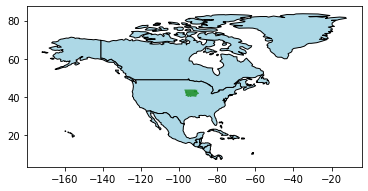

In [11]:
#plot world map
axis=world_data[world_data.continent=='North America'].plot(
color='lightblue',edgecolor='black')
file.plot(ax=axis,color='green')

#Concentrating on one region, the farm

In [12]:
from shapely.geometry import Polygon
MINX, MINY, MAXX, MAXY = [-93.756155, 41.918015, -93.747334, 41.921429]
polygon = Polygon(((MINX, MINY), (MINX, MAXY), (MAXX, MAXY), (MAXX, MINY), (MINX, MINY)))

grid = gpd.GeoDataFrame([polygon], columns=["geometry"])
grid.set_crs(epsg=3857, inplace=True)

grid['centroid'] = grid.centroid
grid["latitude"] = grid.centroid.map(lambda p: p.x)
grid["longitude"] = grid.centroid.map(lambda p: p.y)

grid

farm_df=grid[['latitude','longitude']]
farm_df.to_csv('farm.csv')

In [13]:

import folium
m=folium.Map(location=[41.919722,-93.751744],zoom_start=15)
m

In [14]:
folium.Marker(location=[41.919722,-93.751744],popup='The Farm',tooltip='Click for more information').add_to(m)
m

In [15]:
pip install elevation

In [16]:
pip install richdem

In [17]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import elevation
import richdem as rd

matplotlib.rcParams['figure.figsize'] = (8, 5.5)

The elevation module provides access to elevation data from the NASA SRTM mission, with areas of interest specified using a bounding box. A bounding box is drawn around iowa state and the clip function is used to output a GeoTIFF.

In [18]:
dem_path = os.path.join(os.getcwd(), '/content/iowa.tif')
elevation.clip(bounds=([-122.4, 41.2, -122.1, 41.5]), output=dem_path)

### Loading the DEM file 

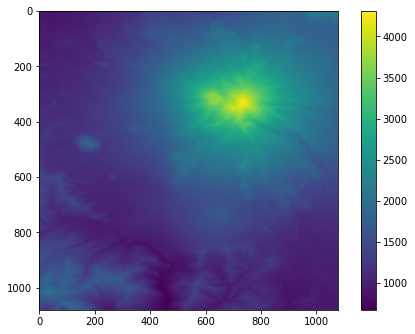

In [24]:
iowa_dem = rd.LoadGDAL(dem_path)

plt.imshow(iowa_dem, interpolation='none')
plt.colorbar()
plt.show()

### Compute the slope and terrain aspect

The rd.TerrainAttribute function is used to compute slope and aspect for each pixel. 

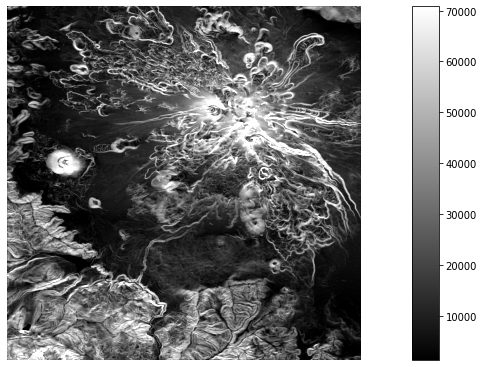

In [28]:
slope = rd.TerrainAttribute(iowa_dem, attrib='slope_riserun')
rd.rdShow(slope, axes=False, cmap='gray', figsize=(8, 5.5))
plt.show()

This the plot of the slope around Iowa State

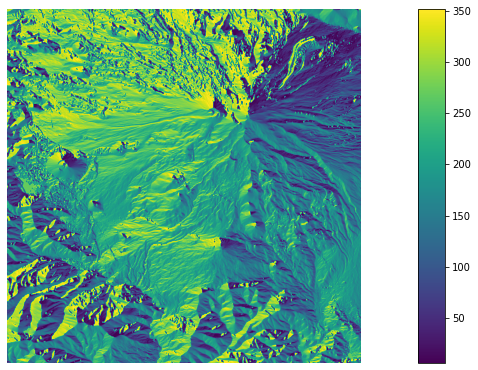

In [29]:
aspect = rd.TerrainAttribute(iowa_dem, attrib='aspect')
rd.rdShow(aspect, axes=False, cmap='viridis', figsize=(8, 5.5))
plt.show()

This is the plot of the aspect around Iowa State

In [19]:
#Plot of the countour line with the selected area to extract vertices
ax = rasterAoi.plot(color='green', figsize=(12,12), alpha=0.2);
topo1.plot(ax=ax,alpha=0.5)
ax.grid()